Saving bava.csv to bava.csv
✅ File Loaded Successfully!

📄 First 5 Rows:
                   Variable       Breakdown  \
0  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
1  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
2  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
3  _01_Total_RD_Expenditure  ANZSIC_1_Digit   
4  _01_Total_RD_Expenditure  ANZSIC_1_Digit   

                    Breakdown_category  Year RD_Value Status  \
0  A_Agriculture, Forestry and Fishing  2016       91    NaN   
1  A_Agriculture, Forestry and Fishing  2018       89    NaN   
2  A_Agriculture, Forestry and Fishing  2019      ...    NaN   
3  A_Agriculture, Forestry and Fishing  2020       99    NaN   
4  A_Agriculture, Forestry and Fishing  2021      ...    NaN   

                    Unit Footnotes Relative_Sampling_Error  
0  NZ Dollars (millions)        12                    23.8  
1  NZ Dollars (millions)        12                    51.7  
2  NZ Dollars (millions)        12                     ...  
3  NZ Dollars (

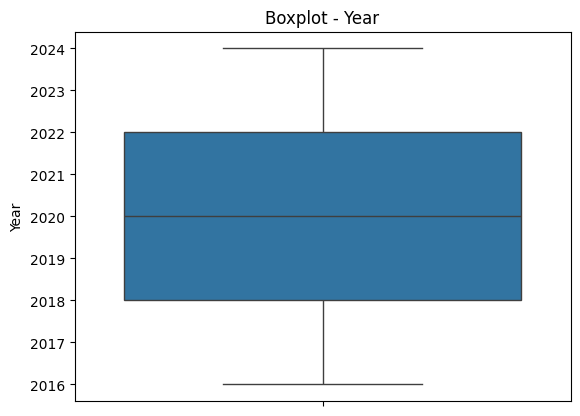

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 128200 (\N{CHART WITH UPWARDS TREND}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


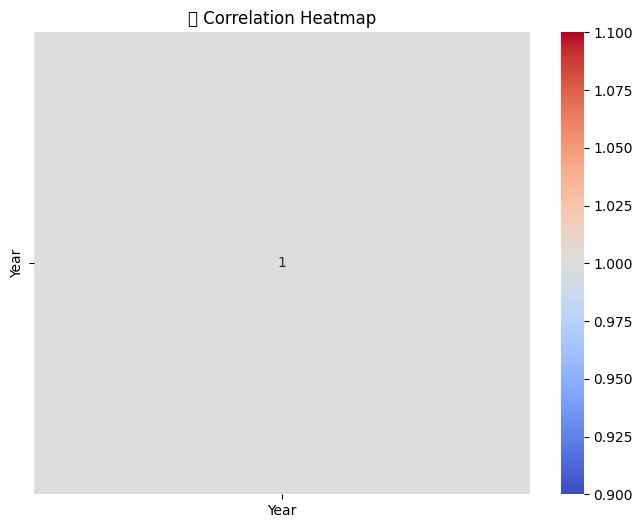

In [1]:
# Step 1: Import libraries
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from google.colab import files

# Step 2: Upload CSV file
uploaded = files.upload()

# Step 3: Read the CSV file
data = pd.read_csv(next(iter(uploaded)))  # reads uploaded file without renaming
print("✅ File Loaded Successfully!")

# Step 4: Show first few rows and info
print("\n📄 First 5 Rows:")
print(data.head())

print("\nℹ Dataset Info:")
print(data.info())

# Step 5: Check missing values and duplicates
print("\n🧼 Missing Values:\n", data.isnull().sum())
print("🔁 Duplicates Found:", data.duplicated().sum())

# Step 6: Convert 'Gender' to numbers if it exists
if 'Gender' in data.columns:
    data['Gender'] = data['Gender'].map({'Male': 0, 'Female': 1})
    print("\n✅ Gender column converted to numeric.")

# Step 7: Boxplots for all numeric columns
numeric_cols = data.select_dtypes(include='number').columns
print(f"\n📊 Numeric columns: {list(numeric_cols)}")

for col in numeric_cols:
    plt.figure()
    sns.boxplot(y=data[col])
    plt.title(f'Boxplot - {col}')
    plt.show()

# Step 8: Correlation heatmap
plt.figure(figsize=(8, 6))
sns.heatmap(data[numeric_cols].corr(), annot=True, cmap='coolwarm')
plt.title('📈 Correlation Heatmap')
plt.show()